# Solve PDE. A simple example

The first step is define our problem.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
L=1E-3 # Thickness
D=1E-9 # Diffusion coefficient
c0=1E-4 # Initial concentration at t=t0
c8=1 # Concentration at the Boundary
t0=0 # initial  time t=0
t8=300 # end time

In [2]:
nt=20 # Number of time discretization points. Not really important as the ODE solver chooses its own time points. 
t=np.linspace(t0,t8,nt) # We just use it for t so we can evaluate it at equidistant  
nz=20 # Number of space discretization points. 
dz=L/nz # equidistant spacing
z=np.linspace(0,L+dz,nz+1) #space


The initial condition is

0. $c(t=0,z)=0$ The starting concentration is the same everywhere.


In [3]:
cinit=c0*np.ones(nz+1) 
cinit[-1]=c8 # Dirichlet Boundary.

Fick's law is defined as: $J=D\frac{\partial c}{\partial z}$

Continuity requires: $\frac{\partial c}{\partial t}=\frac{\partial J}{\partial z}$

The PDE is second order and two boundary conditions are needed which are:

1. $\frac{\partial c}{\partial z}(t,z=0)=J(t,z=0)=0$  No Flux leaves the other side. Which is called Neumann Boundary as it affects the derivative $\frac{\partial c}{\partial z}$.

2. $c(t,z=L)=c^{\infty}$ A concentration different from the initial conditions is at the surface . Which is called Dirichlet Boundary as it affects the concentration $c$.

In [4]:
def ode(t,c): # the solve_ivp function accepts a function of input f(time,variable). Where time is a scalar and variable is a vector
    J=np.zeros_like(c) #  The number of fluxes must be the same as concentrations which are nz+1
    dc=np.diff(c) # We approximate the derivative of the concentrations by a difference. However, we can only do this for nz concentrations.
    J[1:]=D*dc/dz # As a result, we can only calculate nz fluxes.
    J[0]=0. # Thus, the Neumann Boundary is applied here which gives us the additional flux that we need.
    dcdt=np.zeros_like(c) #  The number of concentration changes must be the same as concentrations which are nz+1
    dcdt[:-1]=np.diff(J)/dz # Again. The continuity equation only gives us nz concentration changes
    dcdt[-1]=0 # Thus, the Dirichlet Boundary is applied here as the concetration at the surface is constant 
    return dcdt

c=solve_ivp(ode,(t0,t8),cinit,t_eval=t)["y"]

The most import takeaway in using finite elements is to recognize that if there there are nz elements we need nz+1 interfaces to describe them.  

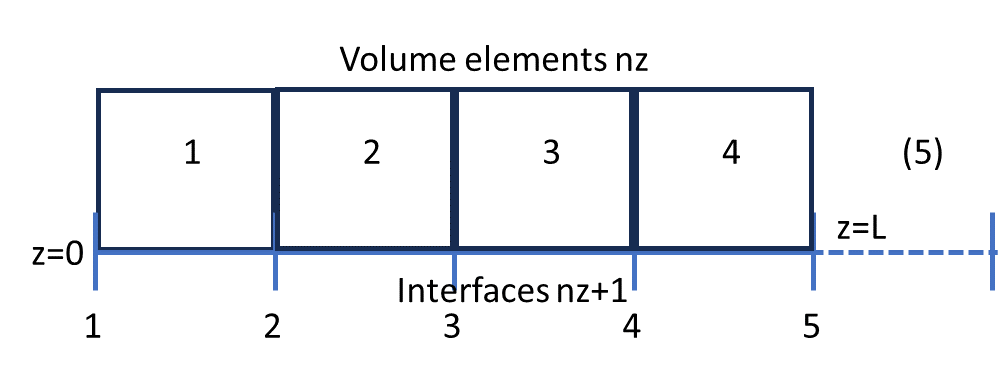

...and that is it. The rest is just for plotting the concentration profiles against time and space

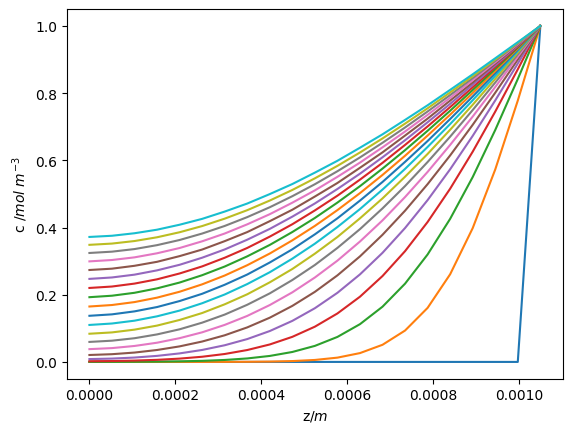

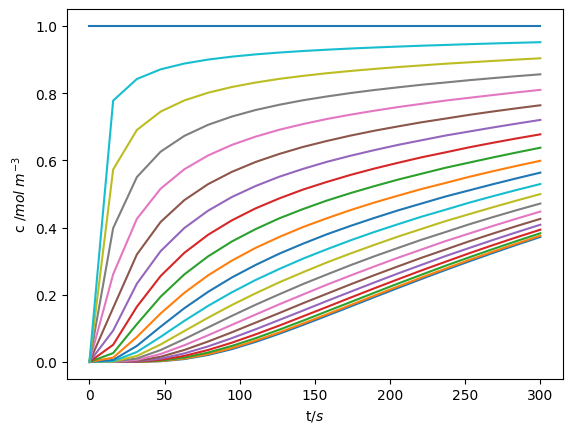

In [5]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
ax.plot(z,c)
ax.set_xlabel("z/$m$")
ax.set_ylabel("c /$mol$ $m^{-3}$")

fig2,ax2=plt.subplots()
ax2.plot(t,c.T)
ax2.set_xlabel("t/$s$")
ax2.set_ylabel("c /$mol$ $m^{-3}$")

plt.show()
